In [ ]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\mvall\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


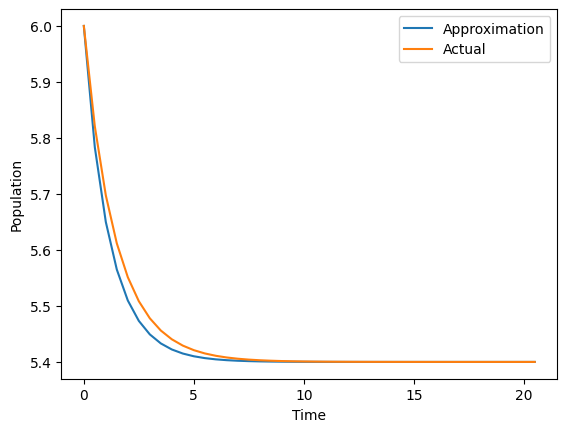

In [39]:
#Task set A, problem 2, h = 0.5

import matplotlib.pyplot as plt
import math

e = math.e

r = 0.65
L = 5.4
h = 0.5                                  #Step size 0.5
t = [0]
x = [6]
xActual = [6]
tVariable = 0
xVariable = 6


while tVariable <= 20:
    dx = (r*xVariable)*(1-xVariable/L)
    xVariable = xVariable + dx * h
    tVariable += 0.5
    x.append(xVariable)
    t.append(tVariable)
    xActual.append((L*6*pow(e,r*tVariable))/(L+6*(-1+pow(e,r*tVariable))))


plt.plot(t ,x)
plt.plot(t, xActual)

plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(['Approximation', 'Actual'])

plt.show()











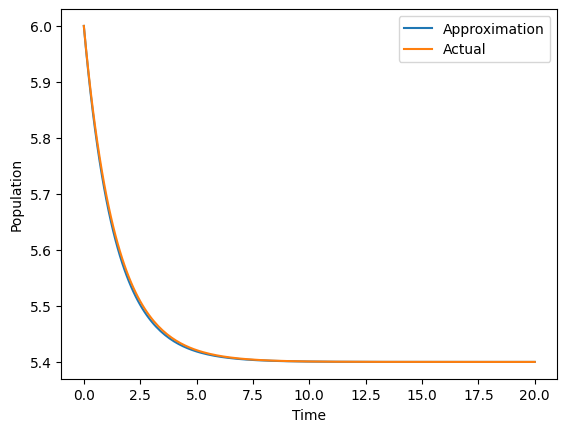

In [38]:
#Task set A, problem 2, h = 0.1

import matplotlib.pyplot as plt
import math

e = math.e

r = 0.65
L = 5.4
h = 0.1                                  #Step size 0.1
t = [0]
x = [6]
xActual = [6]
tVariable = 0
xVariable = 6


while tVariable <= 20:
    dx = (r*xVariable)*(1-xVariable/L)
    xVariable = xVariable + dx * h
    tVariable += 0.1
    x.append(xVariable)
    t.append(tVariable)
    xActual.append((L*6*pow(e,r*tVariable))/(L+6*(-1+pow(e,r*tVariable))))


plt.plot(t ,x)
plt.plot(t, xActual)

plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(['Approximation', 'Actual'])

plt.show()











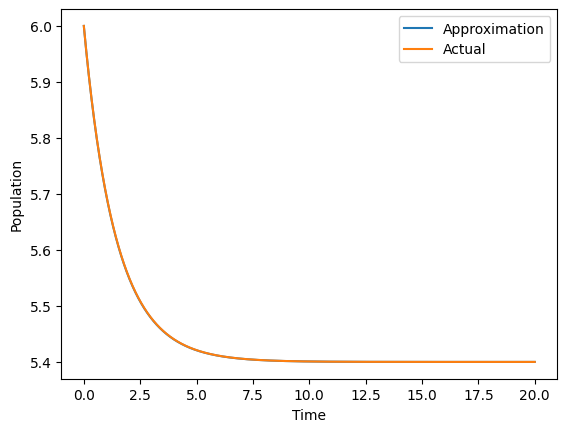

In [ ]:
#Task set A, problem 2, h = 0.01

import matplotlib.pyplot as plt
import math

e = math.e

r = 0.65
L = 5.4
h = 0.01                                  #Step size 0.01
t = [0]
x = [6]
xActual = [6]
tVariable = 0
xVariable = 6


while tVariable <= 20:
    dx = (r*xVariable)*(1-xVariable/L)
    xVariable = xVariable + dx * h
    tVariable += 0.01
    x.append(xVariable)
    t.append(tVariable)
    xActual.append((L*6*pow(e,r*tVariable))/(L+6*(-1+pow(e,r*tVariable))))


plt.plot(t ,x)
plt.plot(t, xActual)

plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(['Approximation', 'Actual'])

plt.show()









